### 2.1 Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(10)

In [2]:
dataset = load_boston()
boston_housing = pd.DataFrame(dataset.data, columns= map(str.lower, dataset.feature_names))
boston_housing['medv'] = dataset.target
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2.2 EDA

In [3]:
boston_housing.shape

(506, 14)

In [4]:
boston_housing.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [5]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Histogram of response variable

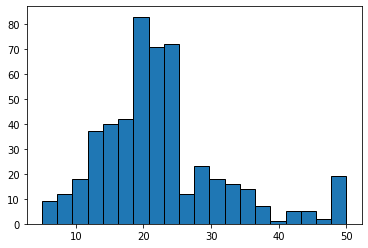

In [7]:

plt.hist(boston_housing['medv'], bins=20, edgecolor = 'black')
plt.show()

In [8]:
boston_housing.corr().style.background_gradient(cmap="coolwarm")

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


- The response variable medv is highly correlated with lstat, rm , ptratio

#### Box plots for lstat, rm , ptratio to check for outliers

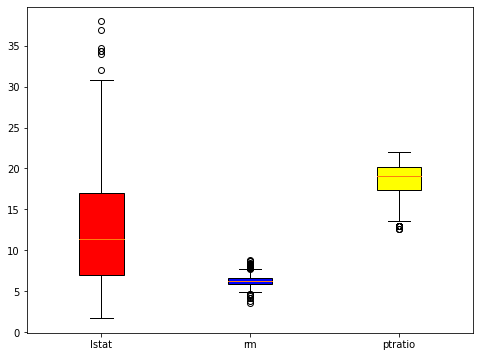

In [9]:
plt.figure(figsize = (8,6))
box = plt.boxplot([boston_housing['lstat'],boston_housing['rm'], boston_housing['ptratio']], patch_artist=True)
colors = ['red', 'blue', 'yellow']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2, 3], ['lstat', 'rm', 'ptratio'])
plt.show()

### 2.3 Preparation

In [10]:
from sklearn.model_selection import train_test_split
from random import sample

In [11]:
num = list(range(len(boston_housing)))
ran = sample(num, int(len(num)*0.9))
rem = [i for i in num if i not in ran] 

boston_train = boston_housing.iloc[ran, :]
boston_test = boston_housing.iloc[rem, :]

#for sklearn LinearRegression function 

X_train = boston_train.iloc[:,:-1]
y_train = boston_train.iloc[:,-1:]

X_test = boston_test.iloc[:,:-1]
y_test = boston_test.iloc[:,-1:]

### 2.3.2 (Optional) Standardization

In [12]:
from sklearn import preprocessing

In [13]:
pd.DataFrame(preprocessing.scale(X_train),columns = X_train.columns)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.437533,2.916285,-0.897676,-0.275046,-1.224031,0.469734,-1.596976,0.617655,-0.635161,-0.963193,0.337849,0.434205,-1.124640
1,-0.306652,-0.488558,-0.434828,-0.275046,-0.137198,-0.519462,-1.386948,0.326491,-0.635161,-0.594499,1.176837,0.324421,-0.854566
2,-0.427489,-0.488558,0.399460,3.635760,-0.034506,0.103945,0.859290,-0.208306,-0.520023,-0.778846,-0.967243,0.399686,-0.291433
3,-0.416903,0.447774,-0.765641,-0.275046,-1.052876,-0.105281,0.389396,2.002012,-0.289745,-0.457725,0.291238,0.207426,-0.341713
4,-0.425551,-0.488558,0.403813,-0.275046,-1.001530,0.538052,-1.322871,1.015090,-0.635161,-0.701539,-1.153685,0.434205,-0.899099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,6.133580,-0.488558,1.010304,-0.275046,0.367708,-0.772810,1.129836,-1.127018,1.667615,1.540361,0.803953,-3.873069,-0.347459
451,1.523765,-0.488558,1.010304,-0.275046,1.000981,0.496777,0.891329,-1.159098,1.667615,1.540361,0.803953,0.064105,1.538749
452,-0.439672,0.256252,-1.415660,-0.275046,-1.180386,1.144379,-0.311886,2.551930,-0.750300,-1.135647,0.058186,0.394224,-0.643391
453,-0.436650,2.916285,-1.338761,-0.275046,-1.206915,-0.906600,-1.650373,3.193894,-0.635161,-0.433938,1.642941,0.280179,-0.643391


### 3 Model Building

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model_1 = smf.ols(formula='medv ~ crim + zn + indus + nox + age + rm + dis + rad + tax + ptratio + b + lstat', data = boston_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     106.7
Date:                Thu, 27 May 2021   Prob (F-statistic):          3.04e-122
Time:                        20:47:23   Log-Likelihood:                -1344.8
No. Observations:                 455   AIC:                             2716.
Df Residuals:                     442   BIC:                             2769.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1782      5.464      6.255      0.000      23.439      44.918
crim          -0.0737      0.040     -1.832      0.068      -0.153       0.005
zn             0.0370      0.014      2.552      0.011       0.008       0.065
indus          0.0586      0.064      0.915      0.361      -0.067       0.185
nox          -17.9292      3.985     -4.499      0.000     -25.761     -10.097
age           -0.0013      0.014     -0.092      0.927      -0.029       0.026
rm             4.3866      0.454      9.653      0.000       3.494       5.280
dis           -1.4072      0.209     -6.749      0.000      -1.817      -0.997
rad            0.2784      0.071      3.933      0.000       0.139       0.418
tax           -0.0134      0.004     -3.352      0.001      -0.021      -0.006
ptratio       -1.0343      0.139     -7.415      0.000      -1.308      -0.760
b              0.0098      0.003      3.501      0.001       0.004       0.015
lstat         -0.4961      0.056     -8.811      0.000      -0.607      -0.385
==============================================================================
Omnibus:                      169.033   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.435
Skew:                           1.565   Prob(JB):                    1.04e-176
Kurtosis:                       8.740   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.1 (Optional) Interaction terms in model

In [15]:
model_2 = smf.ols(formula='medv ~ crim : zn - 1', data=boston_train).fit()

#The following way automatically add the main effects of crim and zn
model_2 = smf.ols(formula='medv ~ crim * zn - 1', data=boston_train).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.372
Model:                            OLS   Adj. R-squared (uncentered):              0.368
Method:                 Least Squares   F-statistic:                              89.33
Date:                Thu, 27 May 2021   Prob (F-statistic):                    2.10e-45
Time:                        20:47:23   Log-Likelihood:                         -1994.2
No. Observations:                 455   AIC:                                      3994.
Df Residuals:                     452   BIC:                                      4007.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim           0.6707      0.107      6.258      0.000       0.460       0.881
zn             0.3583      0.042      8.588      0.000       0.276       0.440
crim:zn        2.5253      0.449      5.630      0.000       1.644       3.407
==============================================================================
Omnibus:                       29.462   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.156
Skew:                          -0.396   Prob(JB):                     6.39e-13
Kurtosis:                       4.528   Cond. No.                         12.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 Diagnostic Plots

In [16]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

pred = base_model.predict(X_train)

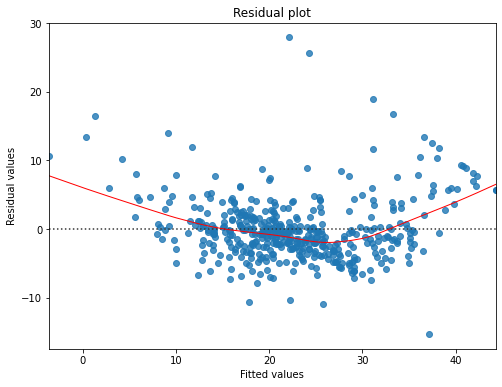

In [17]:
plt.figure(figsize = (8,6))
sns.residplot(pred.reshape(-1), y_train, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residual values")
plt.title('Residual plot')
plt.show()

###  QQ Plot

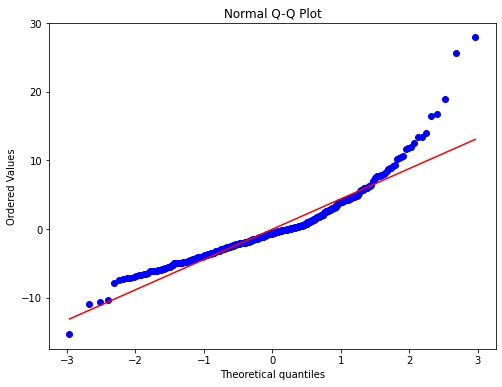

In [18]:
from scipy import stats
residuals = y_train['medv'] - pred.reshape(-1)

plt.figure(figsize=(8,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

### Scale-Location plot

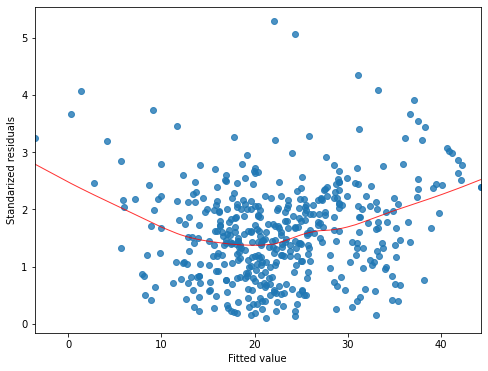

In [19]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(8,6))
sns.regplot(pred.reshape(-1), model_norm_residuals_abs_sqrt, scatter=True, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

### Residual vs. Leverage

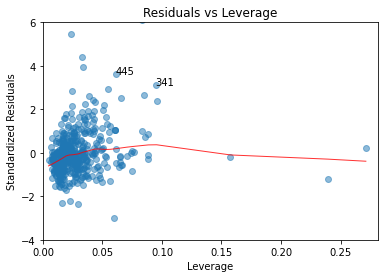

In [20]:
# normalized residuals
model_norm_residuals = model_1.get_influence().resid_studentized_internal
# leverage, from statsmodels internals
model_leverage = model_1.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_1.get_influence().cooks_distance[0]



plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-4, 6)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

  # annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

### 5 Model Assessment

#### 5.1 In-sample model evaluation (train error)

In [21]:
pred = model_1.predict(boston_train)

In [22]:
# MSE of the model
error = boston_train['medv'] - pred 
MSE = (error*error).mean()
MSE

21.609998105192275

In [23]:
# R Squared
model_1.rsquared

0.7433860655818334

In [24]:
# Adjusted R square
model_1.rsquared_adj

0.7364191714347339

In [25]:
# AIC and BIC of the model, these are information criteria. Smaller values indicate better fit.
model_1.aic

2715.520082906998

In [26]:
model_1.bic

2769.0839493533604

#### 5.2 Out-of-sample prediction (test error)

In [27]:
#MSPE for test data
pi = model_1.predict(boston_test)
test_error = boston_test['medv'] - pi 
test_MSE = (test_error*test_error).mean()
test_MSE

30.634875826081625

In [28]:
# MAE for test data
test_MAE = test_error.abs().mean()
test_MAE

3.532672373257574